<div style="overflow: hidden;">
    <div style="float: right; margin-left: 20px;">
        <img src="https://i.pinimg.com/originals/88/48/21/884821fcc2d940ae35532687d3561c9f.jpg" alt="Fake or real news classification" width="400"/>
    </div>
<div style="margin-top: 40px; font-family: 'Arial', sans-serif;">
    
<span style="color:#c44b7e; font-size: 24px; font-family: 'Courier New', sans-serif; font-weight: 600;">**Fake or real news classification** 📰</span>

    
**Done by:** Lujain Yousef

**Columns:**
- **title:**  
    This column contains the titles of news articles or headlines. It represents the main headline or title of the news story.
  
- **text:**  
    This column contains the main body of the news article. It includes the full text of the news story, providing more context and details beyond the headline.
  
- **label:**  
    This column indicates whether the news article is classified as "FAKE" or "REAL". It's likely a binary classification where "FAKE" denotes articles that are considered false or misleading, while "REAL" denotes articles that are considered genuine or accurate.

**Text Vectorization and Classification:**
- I performed text vectorization using both CountVectorizer and TF-IDF to convert the text data into numerical features suitable for machine learning models. After that, I applied Multinomial Naive Bayes classifier to classify the news articles into "FAKE" or "REAL" categories.


## <span style="color:#c44b7e; font-family: 'Courier New', sans-serif; font-weight: 600;">Data</span>

In [7]:
import pandas as pd 
df = pd.read_csv('fake_or_real_news.csv',index_col='Unnamed: 0')
df

,title,text,label
8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...
4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [2]:
df.columns

Index(['title', 'text', 'label'], dtype='object')

## <span style="color:#c44b7e; font-family: 'Courier New', sans-serif; font-weight: 600;">Named entity recognation</span>

In [8]:
from nltk import word_tokenize, pos_tag, ne_chunk
from nltk.chunk import conlltags2tree, tree2conlltags
# Function to perform named entity recognition on text
def extract_entities(text):
    tokens = word_tokenize(text)
    pos_tags = pos_tag(tokens)
    tree = ne_chunk(pos_tags)
    iob_tags = tree2conlltags(tree)
    entities = [(token, iob) for token, _, iob in iob_tags if iob != 'O']
    return entities


In [9]:
# Apply the function to the 'text_column' and create a new column for extracted entities
df['extracted_entities'] = df['text'].apply(extract_entities)

In [6]:
display(df[['text','extracted_entities']])

,text,extracted_entities
8476,"Daniel Greenfield, a Shillman Journalism Fello...","[(Daniel, B-PERSON), (Greenfield, B-ORGANIZATI..."
10294,Google Pinterest Digg Linkedin Reddit Stumbleu...,"[(Google, B-PERSON), (Pinterest, B-PERSON), (D..."
3608,U.S. Secretary of State John F. Kerry said Mon...,"[(U.S., B-GPE), (State, B-ORGANIZATION), (John..."
10142,"— Kaydee King (@KaydeeKing) November 9, 2016 T...","[(Kaydee, B-PERSON), (King, I-PERSON), (Dem, B..."
875,It's primary day in New York and front-runners...,"[(New, B-GPE), (York, I-GPE), (Hillary, B-PERS..."
...,...,...
4490,The State Department told the Republican Natio...,"[(State, B-ORGANIZATION), (Department, I-ORGAN..."
8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,"[(PBS, B-ORGANIZATION), (Should, I-ORGANIZATIO..."
8622,Anti-Trump Protesters Are Tools of the Oligar...,"[(Oligarchy, B-ORGANIZATION), (Arthur, B-PERSO..."
4021,"ADDIS ABABA, Ethiopia —President Obama convene...","[(ADDIS, B-ORGANIZATION), (ABABA, B-GPE), (Eth..."


## <span style="color:#c44b7e; font-family: 'Courier New', sans-serif; font-weight: 600;">Words Frequency & dispersion plot</span>

In [10]:
from collections import Counter
import nltk
from nltk.corpus import stopwords
import warnings
warnings.filterwarnings("ignore")
# Get the list of English stop words
stop_words = set(stopwords.words('english'))

# Initialize an empty list to store the unique words for each row
unique_words_per_row = []

# Iterate over the rows of the DataFrame
for index, row in df.iterrows():
    # Extract the text from the 'text' column of the current row
    text = row['text']
    
    # Tokenize the text into words
    words = text.split()  # You can use a more sophisticated tokenizer if needed
    
    # Remove stop words
    words = [word for word in words if word.lower() not in stop_words]
    
    # Remove duplicate words and count the occurrences of each unique word
    unique_words = Counter(words)
    
    # Append the set of unique words to the list
    unique_words_per_row.append(unique_words)


In [5]:
for i, unique_words in enumerate(unique_words_per_row):
    print(f"Unique words for row {i+1}:")
    print(unique_words)


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Counter({'drug': 12, 'effects': 11, 'side': 8, 'study': 8, 'found': 8, 'increased': 8, 'use': 7, 'medical': 7, 'may': 6, 'mood': 6, 'birth': 6, 'antibiotics': 6, 'drugs': 6, 'taking': 6, 'like': 6, 'women': 6, 'control': 5, 'even': 5, 'also': 5, 'says': 5, 'depression': 5, 'AlterNet': 4, 'new': 4, 'popular': 4, 'disease': 4, 'dangerous': 4, 'PPI': 4, 'reported': 4, 'patients': 4, 'risk': 4, 'children': 4, 'Pill': 4, 'Health': 4, 'men': 4, 'sexual': 4, 'Tylenol': 4, 'acetaminophen': 4, 'pills,': 3, 'blood': 3, 'risks': 3, 'years': 3, 'users': 3, 'PPIs': 3, 'heart': 3, 'people': 3, 'studies': 3, 'Antibiotics': 3, 'antibiotic': 3, 'sales': 3, 'know': 3, 'warnings': 3, 'pills': 3, 'links': 3, 'depression,': 3, 'Women’s': 3, 'caused': 3, 'linked': 3, 'dysfunction': 3, 'disorders,': 3, 'finasteride': 3, 'Journal': 3, 'pain': 3, 'beta': 3, 'blockers': 3, 'Pharma': 2, 'less': 2, 'high': 2, 'pressure': 2, 'gastroesophageal': 2, 'reflux': 2, 'associated': 2, 'drugs,': 2, 'adverse': 2, 'seen': 2,

<Figure size 1000x500 with 0 Axes>

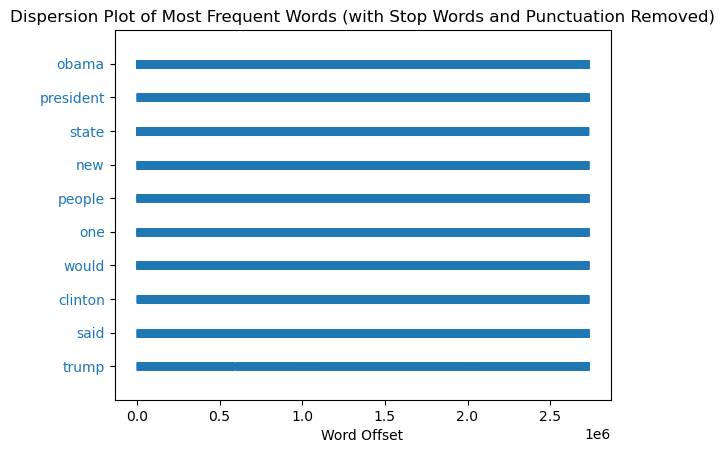

In [24]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import string
import matplotlib.pyplot as plt

# Combine all text from the 'text' column into a single string
all_text = ' '.join(df['text'])

# Tokenize the combined text into words and remove punctuation
tokens = word_tokenize(all_text)
tokens = [word.lower() for word in tokens if word.isalnum()]

# Remove stop words
stop_words.update({'aa','aaa','ยงade','also','aaas'}) 
filtered_tokens = [word for word in tokens if word not in stop_words]

# Calculate the frequency distribution of words
freq_dist = FreqDist(filtered_tokens)

# Select the most frequent words (e.g., top 10)
most_common_words = freq_dist.most_common(10)  # Adjust as needed

# Extract the most frequent words
words = [word for word, _ in most_common_words]

# Determine the positions of these words in the text
positions = [i for i, token in enumerate(filtered_tokens) if token in words]

# Create a dispersion plot
plt.figure(figsize=(10, 5))
nltk.draw.dispersion.dispersion_plot(filtered_tokens, words)
plt.title('Dispersion Plot of Most Frequent Words (with Stop Words and Punctuation Removed)')
plt.show()



## <span style="color:#c44b7e; font-family: 'Courier New', sans-serif; font-weight: 600;">Text Preprocessing</span>

In [11]:
df.drop('extracted_entities',axis=1,inplace=True)

In [21]:
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

def preprocess_text(text):
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(text.lower())
    # Lemmatize the words
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    # Remove stop words for English
    stop_words_en = set(stopwords.words('english'))
    stop_words_en.update({'aa','aaa','ยงade','also','aaas'}) 
    filtered_tokens = [token for token in tokens if token not in stop_words_en and token.isalpha()]
    # Remove stop words for Arabic
    stop_words_ar = set(stopwords.words('arabic'))
    filtered_tokens = [token for token in filtered_tokens if token not in stop_words_ar and token.isalpha()]
    # Join the tokens back into a string
    processed_text = ' '.join(filtered_tokens)
    return processed_text


In [22]:
df['text'] = df['text'].apply( preprocess_text)

In [15]:
df['text']

8476     daniel greenfield shillman journalism fellow f...
10294    google pinterest digg linkedin reddit stumbleu...
3608     u secretary state john f kerry said monday sto...
10142    kaydee king kaydeeking november lesson tonight...
875      primary day new york front runners hillary cli...
                               ...                        
4490     state department told republican national comm...
8062     p pbs stand plutocratic pentagon posted oct wi...
8622     anti trump protesters tools oligarchy reform a...
4021     addis ababa ethiopia president obama convened ...
4330     jeb bush suddenly attacking trump matters jeb ...
Name: text, Length: 6335, dtype: object

## <span style="color:#c44b7e; font-family: 'Courier New', sans-serif; font-weight: 600;">Splitting the Data</span>

In [25]:
X = df['text']
y = df.label

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=53)

In [10]:
y.value_counts()

label
REAL    3171
FAKE    3164
Name: count, dtype: int64

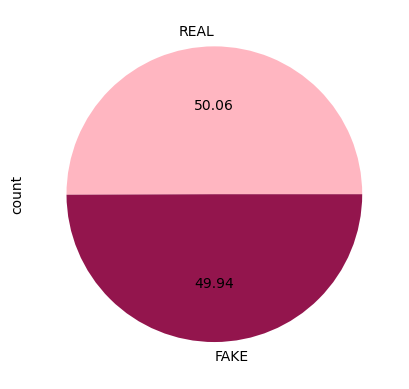

In [6]:
import matplotlib.pyplot as plt

# Assuming y is your pandas Series or DataFrame column
y.value_counts().plot.pie(autopct='%.2f', colors=['#ffb6c1', "#93154d"])
plt.show()


## <span style="color:#c44b7e; font-family: 'Courier New', sans-serif; font-weight: 600;">Count Vectorizer</span>

In [27]:
from sklearn.feature_extraction.text import CountVectorizer
count_vec = CountVectorizer()

In [28]:
count_train = count_vec.fit_transform(X_train)
count_test = count_vec.transform(X_test)

In [29]:
# feature names 
count_vec.get_feature_names_out()[:10]

array(['aab', 'aadmi', 'aahing', 'aaib', 'aalia', 'aam', 'aamaq', 'aamon',
       'aap', 'aarhus'], dtype=object)

In [30]:
import pandas as pd
# Create DataFrame from CountVectorizer transformed data
count_df = pd.DataFrame(count_train.A, columns=count_vec.get_feature_names_out())
count_df

,aab,aadmi,aahing,aaib,aalia,aam,aamaq,aamon,aap,aarhus,...,الدولية,القادمون,اللجنة,تحتاج,تعرفه,تنجح,حلب,عربي,محاولات,والمرضى
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4429,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4430,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4431,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4432,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
count_df.columns

Index(['aab', 'aadmi', 'aahing', 'aaib', 'aalia', 'aam', 'aamaq', 'aamon',
       'aap', 'aarhus',
       ...
       'الدولية', 'القادمون', 'اللجنة', 'تحتاج', 'تعرفه', 'تنجح', 'حلب',
       'عربي', 'محاولات', 'والمرضى'],
      dtype='object', length=48377)

### <span style="color:#c44b7e; font-family: 'Courier New', sans-serif; font-weight: 600;">Tfidf Vectorizer</span>

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vec = TfidfVectorizer()

In [32]:
tfidf_train = tfidf_vec.fit_transform(X_train)
tfidf_test = tfidf_vec.transform(X_test)

In [33]:
tfidf_df = pd.DataFrame(tfidf_train.A,columns=tfidf_vec.get_feature_names_out())
tfidf_df

,aab,aadmi,aahing,aaib,aalia,aam,aamaq,aamon,aap,aarhus,...,الدولية,القادمون,اللجنة,تحتاج,تعرفه,تنجح,حلب,عربي,محاولات,والمرضى
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4429,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4430,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4431,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4432,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## <span style="color:#c44b7e; font-family: 'Courier New', sans-serif; font-weight: 600;">check count_df and tfidf_df if </span>

In [34]:
# Calculate the difference in columns: difference
difference = set(count_df.columns) - set(tfidf_df.columns)
print(difference)

# Check whether the DataFrames are equal
print(count_df.equals(tfidf_df))


set()
False


## <span style="color:#c44b7e; font-family: 'Courier New', sans-serif; font-weight: 600;">Naive Bayes Model on count_df</span>

In [35]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.naive_bayes import MultinomialNB
from scipy.stats import uniform, randint

nb_classifier = MultinomialNB()
# Define the pipeline with CountVectorizer and MultinomialNB
pipeline = Pipeline([
    ('vect', count_vec),
    ('clf', nb_classifier )
])

# Define the parameter distributions to sample from
param_dist = {
    'vect__min_df': randint(1, 3),
    'vect__max_df': uniform(0.5, 0.25),  # Sampling from a uniform distribution between 0.5 and 0.75
    'clf__alpha': uniform(0.1, 0.9),  # Sampling from a uniform distribution between 0.1 and 1.0
}

# Perform randomized search using 5-fold cross-validation
random_search = RandomizedSearchCV(pipeline, param_distributions=param_dist, n_iter=10, cv=5, n_jobs=-1, verbose=1)
random_search.fit(X_train, y_train)

# Print the best parameters found
print("Best parameters found:")
print(random_search.best_params_)

# Evaluate the model on the test set
accuracy = random_search.score(X_test, y_test)
print("Accuracy on test set:", accuracy)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters found:
{'clf__alpha': 0.3207004242339442, 'vect__max_df': 0.7004663059716135, 'vect__min_df': 2}
Accuracy on test set: 0.8979484481851657


## <span style="color:#c44b7e; font-family: 'Courier New', sans-serif; font-weight: 600;">Naive Bayes Model on tfidf_df</span>

In [36]:
# Define the pipeline with TfidfVectorizer and MultinomialNB
pipeline = Pipeline([
    ('vect', tfidf_vec),
    ('clf', nb_classifier)
])

# Define the parameter distributions to sample from
param_dist = {
    'vect__min_df': randint(1, 3),
    'vect__max_df': uniform(0.5, 0.25),  # Sampling from a uniform distribution between 0.5 and 0.75
    'clf__alpha': uniform(0.1, 0.9),  # Sampling from a uniform distribution between 0.1 and 1.0
}

# Perform randomized search using 5-fold cross-validation
random_search = RandomizedSearchCV(pipeline, param_distributions=param_dist, n_iter=10, cv=5, n_jobs=-1, verbose=1)
random_search.fit(X_train, y_train)

# Print the best parameters found
print("Best parameters found:")
print(random_search.best_params_)

# Evaluate the model on the test set
accuracy = random_search.score(X_test, y_test)
print("Accuracy on test set:", accuracy)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters found:
{'clf__alpha': 0.23807810840304605, 'vect__max_df': 0.6592016762875144, 'vect__min_df': 2}
Accuracy on test set: 0.9021567596002105


## <span style="color:#c44b7e; font-family: 'Courier New', sans-serif; font-weight: 600;">Confusion matrix</span>

In [24]:
y.unique()

array(['FAKE', 'REAL'], dtype=object)

In [55]:
# Calculate the confusion matrix: cm
cm = confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])

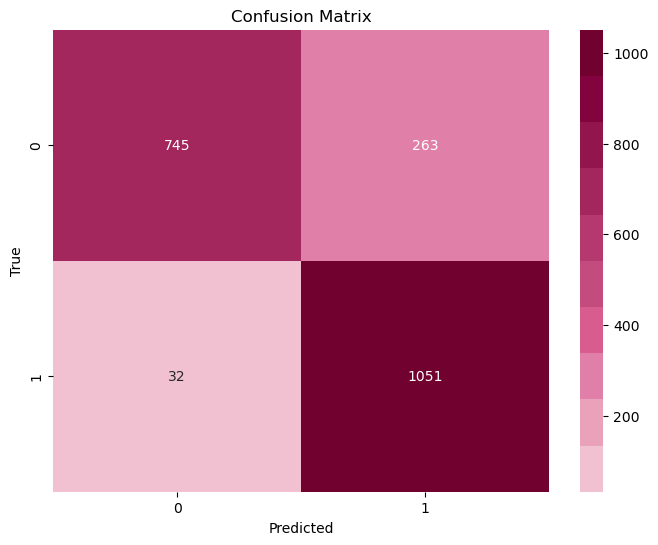

In [56]:
# Plot the confusion matrix using a heatmap 
colors = ["#f1c1d1", "#eaa2bb", "#e080a8", "#d95c8f", "#c44b7e", "#b5386e", "#a3265d", "#93154d", "#82033e", "#71012f"]

# Plot the confusion matrix using a heatmap with the custom color palette
plt.figure(figsize=(8, 6))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap=colors, fmt='g', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# <span style="color:#c44b7e; font-family: 'Courier New', sans-serif; font-weight: 600;">The End</span>